# Projet : Analyse des données de The Movie DataBase (TMDB)

## Plan
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Ménage des données</a></li>
<li><a href="#eda">Analyse exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">Références</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

> Cette analyse concerne les informations d'environ 10 000 films collectées à partir de la base de données The Movie Database (TMDb).
>
> Ces informations se rapportent essentiellement sur les détails des films(Titre, genres, année de réalisation, budget, compagnies de production, popularité, nombre de votes, la moyenne de votes,...)
>
>Au vu de la multitude de films qui existent, les consommateurs du septième art cherchent à savoir ceux qui pourraient les intéresser sans pour autant perdre du temps en essayant celui-ci ou celui là.
>
>Et surtout, pour les enjeux économiques ainsi que le sacrifice qui va avec, les différentes parties prenantes(Maisons de production, Acteurs, salles de ciné, ...) se lancent dans les analyses de ces données avant de s'investir dans un quelconque projet.
>
>Sur ce, notre intérêt se porte sur le monde cinématographique afin de répondre aux questions suivantes:
><ol>
    <li><a href="#question1">En se basant sur la note moyenne de votes, les films ayant obtenu des bonnes notes(supérieures à leur médiane) sont-ils plus nombreux que ceux ayant obtenu des mauvaises notes ?</a></li>
    <li><a href="#question2">Quelle est le genre qui contient le plus de films réalisés ?</a></li>
    <li><a href="#question3">Un nouveau directeur fait ses débuts dans le monde du cinéma, et il veut savoir quelles sont les valeurs en moyenne des caractéristiques suivantes : 'budget', 'revenue', 'runtime', 'popularity' et 'vote_average', pour tous les films d'actions à partir des années 2010.</a></li>
    <li><a href="#question4">Les moyennes des votes de films évoluent-ils positivement par rapport au temps(année de réalisation) ?</a></li>
    <li><a href="#question5">Les notes moyennes des votes de films sont-ils liées à leurs popularités ?</a></li>
</ol>
<!--sur cette analyse
>Pour plus information, voir le site officiel <a href='https://www.themoviedb.org'>TMDB</a>, ou encore le site <a href='https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'>kaggle</a> pour ceux qui veulent avoir accès aux données d'explorations. -->


In [1]:
# Import statements for all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
  
# Include a 'magic word' for visualizing plotted inline with the notebook
%matplotlib inline

pd.set_option('display.max_columns', 21) # Augmenter la limite de colonnes à afficher par défaut.
pd.options.mode.chained_assignment = None  # Disable warnings

<a id='wrangling'></a>
## 2. Ménage des données

> Cette section se rapporte au  chargement de l'ensemble de données concernées, puis à leur vérification et leur nettoyage afin de bien mener l'analyse.

### Préparation des données

In [2]:
# Data loading
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [3]:
# Display dataframe informations
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Rémarque**: En observant les détails des caractéristiques fournies ci-haut, nous constantons que notre ensemble de donées n'est pas dans un état cohérant, et qu'un nettoyage s'avère indispensable pour une bonne suite de l'analyse, à titre d'exemple :
>
>Le nombre total de films est de 10866, tandis que <b>genres</b> n'a que 10843 données, <b>overview</b> en possède 10862... ;
>release_date doit être du type date, mais en par défaut elle vient comme étant de type object.
>
>L'étape suivante sera donc de nettoyer l'ensemble de données.
### Nettoyage des données
#### Conversion des types de données

In [4]:
# Data type conversion
movies_df.release_date = pd.to_datetime(movies_df.release_date)
movies_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

#### Suppression des doublons

In [5]:
# check duplicated movies
print('La somme de films dupliqués =', movies_df.duplicated().sum())
duplicated_movies = movies_df[movies_df.duplicated(['id', 'original_title'])]
duplicated_movies


La somme de films dupliqués = 1


id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  \
2090  Dwight H. Little  Survival is no game   

                                               keywords  \
2090  martial arts|dystopia|based on video game|mart...   

                                               overview  runtime  \
2090  In the year of 2039, after World Wars destroy ...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090   2010-03-20         110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0

In [6]:
# Delete duplicated movie and check again
movies_df.drop_duplicates(inplace = True)
print('La somme de films dupliqués =', movies_df.duplicated().sum())

La somme de films dupliqués = 0


#### Gestion de valeurs manquantes

In [7]:
# Percentage of missing values
data_size = movies_df.shape
nan_values = movies_df.isnull().sum()
nan_values = nan_values.sort_values(ascending=True)
nan_values = nan_values*100/data_size[0]
nan_values

id                       0.000000
release_year             0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
runtime                  0.000000
budget_adj               0.000000
revenue_adj              0.000000
original_title           0.000000
revenue                  0.000000
budget                   0.000000
popularity               0.000000
overview                 0.036815
imdb_id                  0.092039
genres                   0.211689
director                 0.404970
cast                     0.699494
production_companies     9.479982
keywords                13.741371
tagline                 25.991717
homepage                72.977451
dtype: float64

>Après que nous avons converti les types de données et supprimé les doublons, nous devons maintenant nous intéresser aux données maquantes. Il est à signaler que toutes les colonnes ne font pas l'objet de nos analyses. Cela nous pousse à adopter des comportements différents, selon qu'il s'agisse d'une caractéristique pertinante pour nos analyses ou pas.
>
> Pour les colonnes non pertinentes, nous allons juste les ignorer en les laissants vides.
>
>Pour les colonnes pertinentes(genres), nous allons supprimer les lignes contenants de valeurs manquantes.<br>Ce choix est faite parce que la colonnes genres une liste de valeurs pour une ligne, et qu'elle représente 0.21% de valeurs manquantes par rapport à l'ensemble de données. Son taux est vraiment faible, d'où supprimer ces lignes n'aura plus plus d'effets néfastes sur les résultats de nos analyses.

In [8]:
# delete rows for which the relevant characteristic(genres) is null
tmdb_df = movies_df.dropna(axis=0, subset=['genres'])
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10842 non-null  int64         
 1   imdb_id               10834 non-null  object        
 2   popularity            10842 non-null  float64       
 3   budget                10842 non-null  int64         
 4   revenue               10842 non-null  int64         
 5   original_title        10842 non-null  object        
 6   cast                  10767 non-null  object        
 7   homepage              2931 non-null   object        
 8   director              10800 non-null  object        
 9   tagline               8036 non-null   object        
 10  keywords              9367 non-null   object        
 11  overview              10839 non-null  object        
 12  runtime               10842 non-null  int64         
 13  genres          

<a id='eda'></a>
## 3. Analyse exploratoire des données

> Après avoir fini de faire le manage de notre ensemble de données, nous entamons dans cette section l'analyse exploratoire de données afin de répondre aux questions rélevées au niveau de notre introduction.
<a id='question1'></a>
### 1. En se basant sur la note moyenne de votes, les films ayant obtenu des bonnes notes(supérieures à leur médiane) sont-ils plus nombreux que ceux ayant obtenu des mauvaises notes ?

>Pour répondre à cette question, nous allons suivre les étapes suivantes:
>
><ol>
    <li>Trouver la médiane de valeurs de la colonne vote_average </li>
    <li>Répartir les données en deux groupes :
        <ul>
            <li>Une avec les films ayant une note supérieure ou égale à la médiane</li>
        <li>Une autre avec les films avec une note inférieure à la médiane</li>
        </ul>
    </li>
    <li>Trouver la somme de films de chaque groupe</li>
    <li>Interpréter</li>
</ol>

In [9]:
# Get the median of vote_average
vote_average_median = tmdb_df.vote_average.median()

In [10]:
# Get the sum of movies >= median
high_movies_vote_avarage = tmdb_df.query('vote_average >= {}'.format(vote_average_median))
total_high_movies_by_vote_average = len(high_movies_vote_avarage)
total_high_movies_by_vote_average

5795

In [11]:
# Get the sum of movies < median
low_movies_vote_avarage = tmdb_df.query('vote_average < {}'.format(vote_average_median))
total_low_movies_by_vote_average = len(low_movies_vote_avarage)
total_low_movies_by_vote_average

5047

In [12]:
# Display result
print('Somme de films bien côtés : {}\nSomme de films mal côtés : {}'.format(total_high_movies_by_vote_average, total_low_movies_by_vote_average))

Somme de films bien côtés : 5795
Somme de films mal côtés : 5047


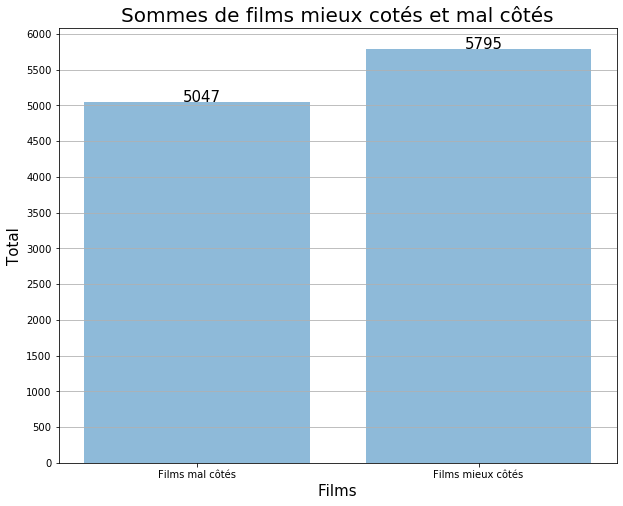

In [13]:
# Plot the bar
location = [1, 2]
heights = [total_low_movies_by_vote_average, total_high_movies_by_vote_average]
labels = ['Films mal côtés', 'Films mieux côtés']

plt.figure(figsize=(10, 8))
plt.bar(location, heights, tick_label=labels, alpha=0.5)
plt.title('Sommes de films mieux cotés et mal côtés', fontsize=20)
plt.grid(axis='y')
plt.xlabel('Films', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000], fontsize=10)
plt.xticks(fontsize=10)

# Set the value of each bar in the top level
plt.text(1-0.05, total_low_movies_by_vote_average, total_low_movies_by_vote_average, fontsize=15)
plt.text(2-0.05, total_high_movies_by_vote_average, total_high_movies_by_vote_average, fontsize=15);


>D'après le résultat de cette analyse, nous pouvons dire que les films ayant obtenu des bonnes notes sont plus nombreux que ceux ayants obtenu des mauvaises notes.

<a id='question2'></a>
### 2. Quelle est le genre qui contient le plus de films réalisés ?

>Pour répondre à cette question, nous allons suivre les étapes suivantes:
>
><ul>
    <li>Trouver la liste "movies_genres" de tous les genres disponibles</li>
    <li>Initialiser un dictionnaire "sum_movies_by_genre" qui va contenir les genres de films(Clé) et la somme de films pour ce genre(Valeur)</li>
    <li>Créer une fonction "getNumberOfMoviesByGenre" qui permet de calculer la somme de films par genre, avec genre comme paramètre</li>
    <li>Pour chaque genre de la liste, appeler la fonction "getNumberOfMoviesByGenre", avec genre comme argument</li>
    <li>Stocker le genre(clé), et la réponse de la fonction "getNumberOfMoviesByGenre" (Valeur) dans le dictionnaire "sum_movies_by_genre"</li>
 </ul>

In [14]:
# Select all genres
movies_genres = tmdb_df.genres
movies_genres_to_string = '|'.join(map(str, movies_genres))
movies_genres = list(movies_genres_to_string.split("|"))
movies_genres = np.unique(movies_genres)
movies_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [15]:
# Create the function witch return the sum of movies by genre
def getNumberOfMoviesByGenre(genre):
    dataframe_by_genre = tmdb_df[tmdb_df['genres'].astype(str).str.contains(genre)]
    return(dataframe_by_genre.shape[0])

In [16]:
# For every, fill the sum_movies_by_genre dictionary by genre(Key), and getNumberOfMoviesByGenre response(Value)
sum_movies_by_genre = {}   # Initialize dictionary

for genre in movies_genres:  # Loop for every genre available
    sum_movies_by_genre[genre] = getNumberOfMoviesByGenre(genre) #fill the dictionary

sum_movies_by_genre

{'Action': 2384,
 'Adventure': 1471,
 'Animation': 699,
 'Comedy': 3793,
 'Crime': 1354,
 'Documentary': 520,
 'Drama': 4760,
 'Family': 1231,
 'Fantasy': 916,
 'Foreign': 188,
 'History': 334,
 'Horror': 1637,
 'Music': 408,
 'Mystery': 810,
 'Romance': 1712,
 'Science Fiction': 1229,
 'TV Movie': 167,
 'Thriller': 2907,
 'War': 270,
 'Western': 165}

In [17]:
# Sort the dictionary to get items in desc order.
sum_movies_by_genre_sorted = sorted(sum_movies_by_genre.items(), key=lambda x: x[1], reverse=True)
sum_movies_by_genre_sorted

[('Drama', 4760),
 ('Comedy', 3793),
 ('Thriller', 2907),
 ('Action', 2384),
 ('Romance', 1712),
 ('Horror', 1637),
 ('Adventure', 1471),
 ('Crime', 1354),
 ('Family', 1231),
 ('Science Fiction', 1229),
 ('Fantasy', 916),
 ('Mystery', 810),
 ('Animation', 699),
 ('Documentary', 520),
 ('Music', 408),
 ('History', 334),
 ('War', 270),
 ('Foreign', 188),
 ('TV Movie', 167),
 ('Western', 165)]

In [18]:
# have the list vote_average to mention the value of each popularity level above its bar in the plot
values_list = list(sum_movies_by_genre.values())

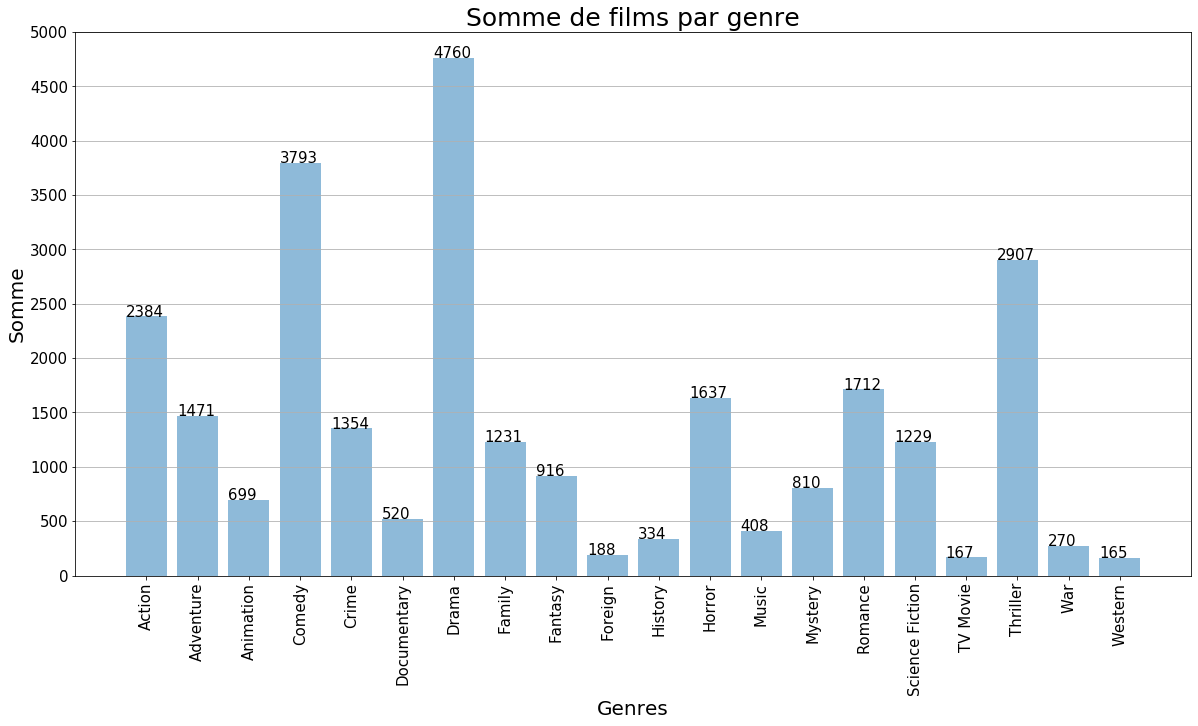

In [19]:
# Plot the bar
plt.figure(figsize=(20, 10))
plt.bar(sum_movies_by_genre.keys(), sum_movies_by_genre.values(), alpha=0.5)
plt.title('Somme de films par genre', fontsize=25)
plt.grid(axis='y')
plt.ylim(0, 5000)    # Define ranges of y axis
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], fontsize=15)    # Set ranges of y axis
plt.xticks(rotation='vertical', fontsize=15)

plt.xlabel('Genres', fontsize=20)
plt.ylabel('Somme', fontsize=20);

for item in range(len(values_list)):
    plt.text(item-0.4, values_list[item], values_list[item], fontsize=15);

>Notre analyse montre que le genre "Drama" compte plus film, avec un nombre de 4760 film sur les 10863 films disponibles.

<a id='question3'></a>
### 3. Un nouveau directeur fait ses débuts dans le monde du cinéma, et il veut savoir quelles sont les valeurs en moyenne des caractéristiques suivantes : 'budget', 'revenue', 'runtime', 'popularity' et 'vote_average', pour tous les films d'actions à partir des années 2010.

In [20]:
# Get movies from 2010
movies_from_2010_df = tmdb_df.query('release_year >= 2010')
movies_from_2010_df


id    imdb_id  popularity     budget     revenue  \
0     135397  tt0369610   32.985763  150000000  1513528810   
1      76341  tt1392190   28.419936  150000000   378436354   
2     262500  tt2908446   13.112507  110000000   295238201   
3     140607  tt2488496   11.173104  200000000  2068178225   
4     168259  tt2820852    9.335014  190000000  1506249360   
...      ...        ...         ...        ...         ...   
6076  173455  tt2737310    0.006115          0      137460   
6077  203351  tt2740710    0.002648          0           0   
6078  376823  tt3231100    0.002647          0           0   
6079  231401  tt3141866    0.002165          0           0   
6080  174323  tt2429074    0.000620          0           0   

                    original_title  \
0                   Jurassic World   
1               Mad Max: Fury Road   
2                        Insurgent   
3     Star Wars: The Force Awakens   
4                        Furious 7   
...                            ...   
6076        Mistaken for Strangers   
6077                  Atlantic Rim   
6078                   Trophy Kids   
6079      The Sound of Music Live!   
6080                        G.B.F.   

                                                   cast  \
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1     Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2     Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4     Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                 ...   
6076  Matt Berninger|Tom Berninger|Aaron Dessner|Bry...   
6077  Graham Greene|David Chokachi|Jackie Moore|Nico...   
6078                                                NaN   
6079  Laura Benanti|Stephen Moyer|Carrie Underwood|C...   
6080  Michael J. Willett|Paul Iacono|Sasha Pieterse|...   

                                               homepage  \
0                         http://www.jurassicworld.com/   
1                           http://www.madmaxmovie.com/   
2        http://www.thedivergentseries.movie/#insurgent   
3     http://www.starwars.com/films/star-wars-episod...   
4                              http://www.furious7.com/   
...                                                 ...   
6076                                                NaN   
6077                                                NaN   
6078                                                NaN   
6079                 http://www.nbc.com/sound-of-music/   
6080                  https://www.facebook.com/GBFmovie   

                              director                          tagline  \
0                      Colin Trevorrow                The park is open.   
1                        George Miller               What a Lovely Day.   
2                     Robert Schwentke       One Choice Can Destroy You   
3                          J.J. Abrams    Every generation has a story.   
4                            James Wan              Vengeance Hits Home   
...                                ...                              ...   
6076                     Tom Berninger                              NaN   
6077                        Jared Cohn             Monsters vs Machines   
6078                        Chris Bell                              NaN   
6079  Beth McCarthy-Miller|Rob Ashford                              NaN   
6080                      Darren Stein  Being out has never been so in.   

                                               keywords  \
0     monster|dna|tyrannosaurus rex|velociraptor|island   
1      future|chase|post-apocalyptic|dystopia|australia   
2     based on novel|revolution|dystopia|sequel|dyst...   
3                 android|spaceship|jedi|space opera|3d   
4                   car race|speed|revenge|suspense|car   
...                                                 ...   
6076                                                NaN   
6077  navy|underw

In [21]:
# Get movies from 2010 where genres equals Action
action_movies_from_2010_df = movies_from_2010_df[movies_from_2010_df['genres'].astype(str).str.contains('Action')]
action_movies_from_2010_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
6   87101  tt1340138    8.654359  155000000   440603537   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
3  Star Wars: The Force Awakens   
4                     Furious 7   
6            Terminator Genisys   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   

                                            homepage         director  \
0                      http://www.jurassicworld.com/  Colin Trevorrow   
1                        http://www.madmaxmovie.com/    George Miller   
3  http://www.starwars.com/films/star-wars-episod...      J.J. Abrams   
4                           http://www.furious7.com/        James Wan   
6                    http://www.terminatormovie.com/      Alan Taylor   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
3  Every generation has a story.   
4            Vengeance Hits Home   
6               Reset the future   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   
6  saving the world|artificial intelligence|cybor...   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   
6  The year is 2029. John Connor, leader of the r...      125   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   
6  Science Fiction|Action|Thriller|Adventure   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   
6            Paramount Pictures|Skydance Productions   2015-06-23        2598   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  
6           5.8          2015  1.425999e+08  4.053551e+08

In [22]:
# Get the mean of action movies from 2010
cols_to_get_the_mean = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average']
action_movies_from_2010_mean = action_movies_from_2010_df[cols_to_get_the_mean].mean().round(2)
action_movies_from_2010_mean

budget          35547188.85
revenue         96357236.62
runtime               99.46
popularity             1.35
vote_average           5.65
dtype: float64

>Pour les films d'actions à partir des années 2010, en moyenne les résultats sont les suivants :
><ul>
    <li>Budget : 35547188.85</li>
    <li>Revenue : 96357236.62</li>
    <li>Durée : 99.46</li>
    <li>Popularité : 1.35</li>
    <li>Moyenne de votes : 5.65</li>
</ul>

<a id='question4'></a>
### 4. Les moyennes des votes de films évoluent-ils positivement par rapport au temps(année de réalisation) ?

>Pour cette question, nous allons procéder de la manière suivante:
>
><ul>
    <li>Grouper les films par année de réalisation </li>
    <li>Pour chaque année de réalisation, trouver la moyenne de toutes les notes moyennes des votes de films (vote_average)</li>
    <li>Tracer les nuages de points pour mener une étude comparative</li>
    <ul>
        <li>x = années de réalisation</li>
        <li>y = moyenne de vote_average</li>
    </ul>
</ul>

In [23]:
movies_vote_avg_per_year = tmdb_df.groupby(['release_year'], as_index=False)['vote_average'].mean()
movies_vote_avg_per_year

release_year  vote_average
0           1960      6.325000
1           1961      6.374194
2           1962      6.343750
3           1963      6.329412
4           1964      6.211905
5           1965      6.194286
6           1966      6.128261
7           1967      6.242500
8           1968      6.379487
9           1969      5.961290
10          1970      6.502500
11          1971      6.420000
12          1972      6.535000
13          1973      6.703636
14          1974      6.426087
15          1975      6.390909
16          1976      6.340426
17          1977      6.147368
18          1978      6.130769
19          1979      6.308772
20          1980      6.160256
21          1981      6.165854
22          1982      6.241975
23          1983      5.971250
24          1984      6.003810
25          1985      6.177064
26          1986      6.004959
27          1987      6.128800
28          1988      5.965517
29          1989      6.075735
30          1990      5.993939
31          1991      6.014286
32          1992      6.081203
33          1993      6.050000
34          1994      5.942391
35          1995      6.052299
36          1996      5.897044
37          1997      5.988542
38          1998      5.970476
39          1999      6.032589
40          2000      5.884513
41          2001      5.890871
42          2002      5.973308
43          2003      5.930961
44          2004      5.988599
45          2005      5.866391
46          2006      5.941422
47          2007      5.964384
48          2008      5.930505
49          2009      5.851601
50          2010      5.989733
51          2011      5.958519
52          2012      5.789384
53          2013      5.875000
54          2014      5.919456
55          2015      5.886762

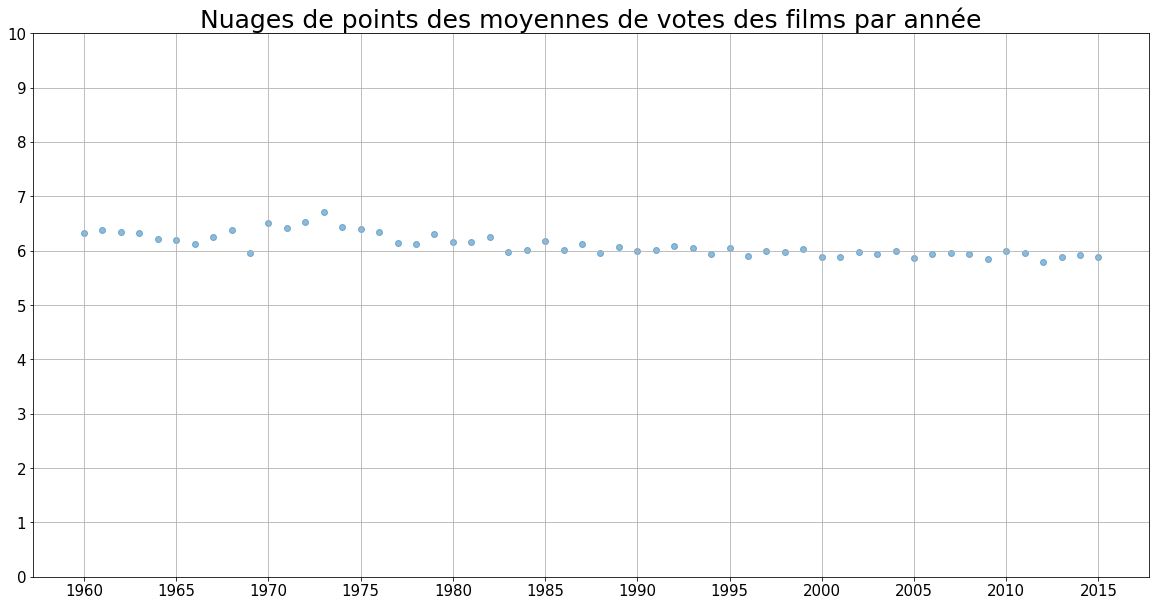

In [24]:
# Plot the bar
plt.figure(figsize=(20, 10))
plt.scatter(movies_vote_avg_per_year.release_year, movies_vote_avg_per_year.vote_average, alpha=0.5)
plt.title('Nuages de points des moyennes de votes des films par année', fontsize=25)
plt.grid()
plt.ylim(0, 10)    # Define ranges of y axis
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=15)    # Set ranges of y axis
plt.xticks([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], fontsize=15)    # Set ranges of y axis
plt.xticks(fontsize=15);

>Le résultat obtenu, représenté par les nuages de points ci-haut, montre que les moyennes des votes de films évoluent de manière constante par rapport au temps, en moyenne entre les notes moyennes de 5 et 6.

<a id='question5'></a>
### 5. Les notes moyennes des votes de films sont-ils liées à leurs popularités ?

>Vu que la colonne popularity contient plusieurs valeurs distinctes, l'approche sera un peu particulière :
><ol>
    <li>Trouver les quartiles de la rubriques popularity</li>
    <li>Sur base de ces quartiles, créer une rubrique popularity_levels avec les valeurs suivantes </li>
        <ul>
            <li>Moins populaire(Less popular): [0 - 25] </li>
            <li>Assez populaire(Somewhat popular) : [25 - 50] </li>
            <li>Populaire(Popular) : [50 - 75] </li>
            <li>Très populaire(Most popular) : [75 - 100] </li>
        </ul>
    <li>Remplir la colonne popularity_levels pour chaque film en utilisant la méthode cut() de pandas</li>
    <li>Grouper le nouveau dateframe en fonction de la colonne popularity_levels</li>
    <li>Pour chaque groupe calculer alors la moyenne de vote_average</li>
    <li>Visualiser le résultat obtenu pour son interprétation</li>
</ol>

In [25]:
# Get the 0 < 25 < 50 < 75 < 100 quantiles of the popularity column
movies_popularity_quantiles = list(tmdb_df.popularity.quantile([0, 0.25, 0.50, 0.75, 1]))

# Define popularity_levels labels
popularity_levels_labels = ['Less popular', 'Somewhat popular', 'popular', 'Most popular']

#Vérifacations
print(movies_popularity_quantiles)
print(popularity_levels_labels)


[6.500000000000001e-05, 0.2082105, 0.3845315, 0.71539325, 32.985763]
['Less popular', 'Somewhat popular', 'popular', 'Most popular']


In [26]:
# Create the popularity_levels column
tmdb_df['popularity_levels'] = pd.cut(tmdb_df['popularity'], movies_popularity_quantiles, labels = popularity_levels_labels)
tmdb_df

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ... runtime  \
0                                      The park is open.  ...     124   
1                                     What a Lovely Day.  ...     120   
2                             One Choice Can Destroy You  ...     119   
3                          Every generation has a story.  ...     136   
4                                    Vengeance Hits Home  ...     137   
...                                                  ...  ...     ...   
10861                                                NaN  ...      95   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...     176   
10863                                                NaN  ...      94   
10864                          WOODY ALLEN STRIKES BACK!  ...      80   
10865       It's Shocking! It's Beyond Your Imagination!  ...      74   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3       Action|Adv

In [27]:
# Get the mean of every popularity_levels value
tmdb_popularity_levels_mean_df = tmdb_df.groupby(['popularity_levels'], as_index=False)['vote_average'].mean().round(1)
tmdb_popularity_levels_mean_df

popularity_levels  vote_average
0      Less popular           5.9
1  Somewhat popular           5.8
2           popular           5.9
3      Most popular           6.3

In [28]:
# have the list vote_average to mention the value of each popularity level above its bar in the plot
vote_average_list = tmdb_popularity_levels_mean_df.vote_average.tolist()

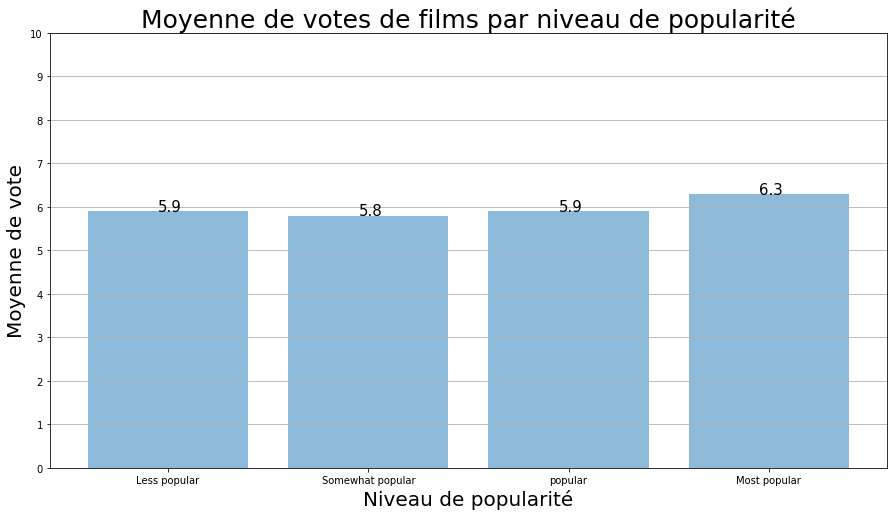

In [29]:
# Plot the bar
plt.figure(figsize=(15, 8))
plt.bar(tmdb_popularity_levels_mean_df.popularity_levels, tmdb_popularity_levels_mean_df.vote_average, alpha=0.5)
plt.title('Moyenne de votes de films par niveau de popularité', fontsize=25)
plt.grid(axis='y')
plt.ylim(0, 10)    # Define ranges of y axis
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])    # Set ranges of y axis
plt.xlabel('Niveau de popularité', fontsize=20)
plt.ylabel('Moyenne de vote', fontsize=20);

# Set the value of each bar in its top level
for item in range(len(vote_average_list)):
    plt.text(item-0.05, vote_average_list[item], vote_average_list[item], fontsize=15)

>D'après le résultat de cette analyse, nous constatons que la popularité des films n'est pas liée à moyenne de votes, car les films moins populaires ont une note moyenne de votes égale à celle des films populaires, et les deux(Films populaires et moins populaires) sont mieux côtés que les films assez populaire.

In [30]:
# Save the dataframe
tmdb_df.to_csv('tmdb-movies_edited.csv', index=False)

# Check the save
new_tmdb_df = pd.read_csv('tmdb-movies_edited.csv')
new_tmdb_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ... runtime  \
0              The park is open.  ...     124   
1             What a Lovely Day.  ...     120   
2     One Choice Can Destroy You  ...     119   
3  Every generation has a story.  ...     136   
4            Vengeance Hits Home  ...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15       5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01       2947   

  vote_average  release_year    budget_adj   revenue_adj  popularity_levels  
0          6.5          2015  1.379999e+08  1.392446e+09       Most popular  
1          7.1          2015  1.379999e+08  3.481613e+08       Most popular  
2          6.3          2015  1.012000e+08  2.716190e+08       Most popular  
3          7.5          2015  1.839999e+08  1.902723e+09       Most popular  
4          7.3          2015  1.747999e+08  1.385749e+09       Most popular  

[5 rows x 22 columns]

<a id='conclusions'></a>
## 4. Conclusion

> Les questions énumérées dans l'introduction ont fait l'objets de nos investigations, pour mieux cerner certains comportements rélatifs au monde du cinéma.
>
>Sur ce, nos explorations se limitent au niveau de la détermination de certaines causes qui justifient certaines tendances, sans pour autant affirmer ou infirmer un fait quelconque, car cela nécessite des tests statistiques.
>
>Ainsi, toutes vos rémarquent et suggestions sont les bienvenues en vu d'une quelconque amélioration.

<a id='References'></a>
## 5. Références

><ul>
    <li>
    <a href='https://pandas.pydata.org/docs/'>Pandas documentation</a>
    </li>
    <li>
    <a href='https://numpy.org/doc/stable/'>NumPy documentation</a>
    </li>
    <li>
    <a href='https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915'>Investigating TMDB Movie Datasets</a>
    </li>
    <li>
    <a href='https://stackoverflow.com/questions/55001289/pandas-groupby-based-on-matching-substring-in-pandas-column'>Stackoverflow - Groupby based on matching substring in pandas column</a>
    </li>
    <li>
    <a href='https://openclassrooms.com/fr/courses/7771531-decouvrez-les-librairies-python-pour-la-data-science/7858361-personnalisez-vos-graphiques-avec-matplotlib'>Personnalisez vos graphiques avec Matplotlib</a>
    </li>
</ul>
